In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [134]:
filepath = './social_simulation.csv'

In [135]:
df = pd.read_csv(filepath)

In [139]:
df.head()

,GreenUsers,NormalUsers,Period,TotalEmission,SimulationIndex
0,29,21,0,4381.134071,0
1,28,22,1,4390.622138,0
2,30,20,2,4633.724382,0
3,30,20,3,4890.203713,0
4,31,19,4,5158.574913,0


In [146]:
df.groupby('Period').agg({'TotalEmission':np.mean})

,TotalEmission
Period,
0,4538.130269
1,4539.770925
2,4799.355439
3,5061.731053
4,5334.684088
5,5627.023625
6,5930.115966
7,6248.804162
8,6584.210631


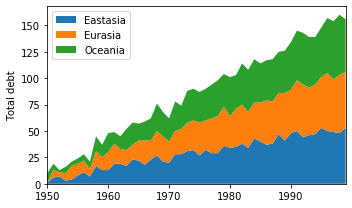

In [32]:
rng = np.arange(50)
rnd = np.random.randint(0,10, size= (3, rng.size))
yrs = 1950 +rng
fig, ax = plt.subplots(figsize=(5,3))
ax.stackplot(yrs,rng+rnd, labels = ['Eastasia', 'Eurasia','Oceania'])
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

In [33]:
x= np.random.randint(low=1, high=11, size=50)
y= x + np.random.randint(1,5, size=x.size)
data = np.column_stack((x,y))

In [35]:
x

array([ 5,  1,  2,  1, 10,  4,  2,  4,  3,  1,  3,  2,  6,  1,  2,  6,  7,
        8,  2,  9,  1,  9,  1,  6,  3,  5,  9, 10,  3,  4,  3,  4,  6,  1,
        1,  5,  5,  8,  2,  8,  9,  3,  7,  3,  4, 10,  6,  4,  8,  6])

In [36]:
y

array([ 9,  2,  4,  5, 14,  8,  3,  6,  5,  3,  5,  5,  9,  5,  5,  7, 10,
       12,  5, 12,  5, 12,  3, 10,  4,  9, 11, 13,  4,  7,  4,  8,  7,  3,
        5,  6,  8, 10,  4,  9, 12,  5, 11,  4,  8, 12,  8,  6,  9,  7])

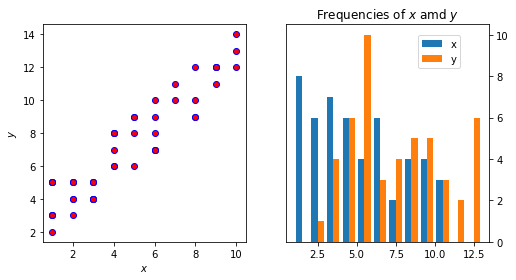

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax1.scatter(x=x,y=y, marker='o', c='r', edgecolor='b')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins = np.arange(data.min(), data.max()), label=('x','y'))
ax2.legend(loc=(0.65,0.8))
ax2.set_title('Frequencies of $x$ amd $y$')
ax2.yaxis.tick_right()

In [55]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

In [56]:
url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

In [59]:
with tarfile.open(mode='r' , fileobj = b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [61]:
y = housing[:,-1]

In [89]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [63]:
ab = np.array([[1,2],[2,3],[4,5]])

In [64]:
ab

array([[1, 2],
       [2, 3],
       [4, 5]])

In [67]:
ab[:,0].T

array([1, 2, 4])

In [92]:
pop, age = housing[:, [4,7]].T

In [103]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text, 
           horizontalalignment='center',
            transform= ax.transAxes,
           bbox=dict(facecolor='white', alpha=0.6),
           fontsize=12.5)
    return ax

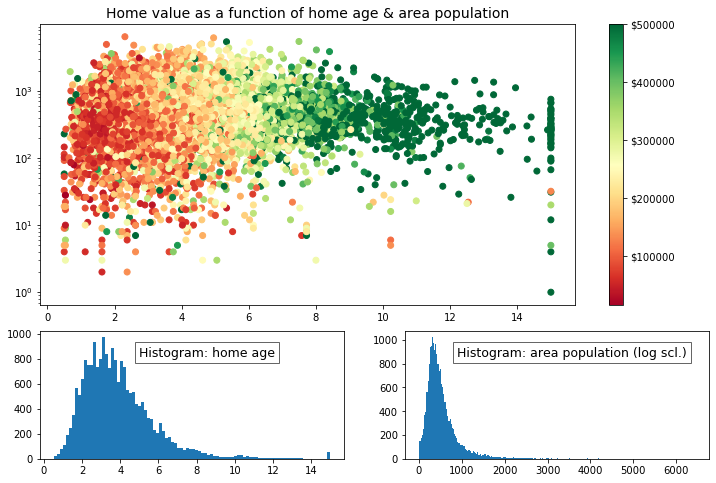

In [104]:
gridsize = (3,2)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2,0))
ax3 = plt.subplot2grid(gridsize, (2,1))

ax1.set_title('Home value as a function of home age & area population', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto')

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

In [107]:
ax3.transAxes

In [160]:
sc_filepath = './social_simulation.csv'
bm_filepath = './benchmark_simulation.csv'

In [180]:
df_sc = pd.read_csv(sc_filepath)
df_bm = pd.read_csv(bm_filepath)

In [148]:
df.head()

,GreenUsers,NormalUsers,Period,TotalEmission,SimulationIndex
0,29,21,0,4381.134071,0
1,28,22,1,4390.622138,0
2,30,20,2,4633.724382,0
3,30,20,3,4890.203713,0
4,31,19,4,5158.574913,0


In [163]:
def aggregate_emissions(df):
    return df.groupby('Period').agg({'TotalEmission':np.mean})['TotalEmission']

In [154]:
emissions = df.groupby('Period').agg({'TotalEmission':np.mean})['TotalEmission']
emissions

Period
0    4538.130269
1    4539.770925
2    4799.355439
3    5061.731053
4    5334.684088
5    5627.023625
6    5930.115966
7    6248.804162
8    6584.210631
9    6938.601566
Name: TotalEmission, dtype: float64

In [157]:
periods = [i for i in range(len(emissions))]
periods

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Text(0.5, 0, 'Period')

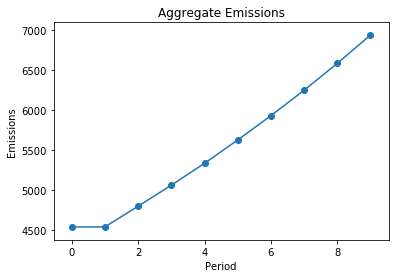

In [158]:
fig, ax = plt.subplots()
ax.plot( periods, emissions)
ax.scatter(periods, emissions)
ax.set_title('Aggregate Emissions')
ax.set_ylabel('Emissions')
ax.set_xlabel('Period')

### Graph benchmark and social on the same graph

In [164]:
df_bm.head()

,GreenUsers,NormalUsers,Period,TotalEmission,SimulationIndex
0,0,100,0,26144.611024,0
1,0,100,1,26144.611024,0
2,0,100,2,26144.611024,0
3,0,100,3,26144.611024,0
4,0,100,4,26144.611024,0


In [168]:
bm_emissions = aggregate_emissions(df_bm)

Text(0.5, 0, 'Period')

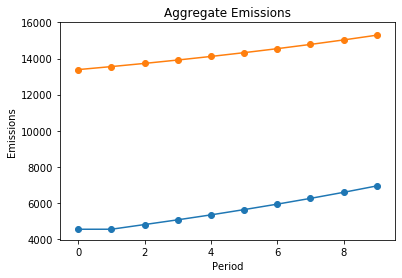

In [170]:
fig, ax = plt.subplots()
ax.plot( periods, emissions)
ax.scatter(periods, emissions)
ax.plot(periods, bm_emissions)
ax.scatter(periods, bm_emissions)
ax.set_title('Aggregate Emissions')
ax.set_ylabel('Emissions')
ax.set_xlabel('Period')

In [177]:
aggregate_emissions(df_bm)

Period
0    13387.330113
1    13554.110097
2    13730.702221
3    13917.678712
4    14115.644378
5    14325.238365
6    14546.770064
7    14781.663483
8    15030.326358
9    15293.554463
Name: TotalEmission, dtype: float64

In [187]:
def emissions_plotter(dfs, labels):
    fig, ax = plt.subplots()
    
    ax.set_title('Aggregate Emissions')
    ax.set_ylabel('Emissions')
    ax.set_xlabel('Period')
    
    
    for i,df in enumerate(dfs):
        emissions = aggregate_emissions(df)
        periods = [i for i in range(len(emissions))]
        
        ax.plot( periods, emissions, label=labels[i])
        ax.scatter(periods, emissions)
    ax.legend(loc='upper left')

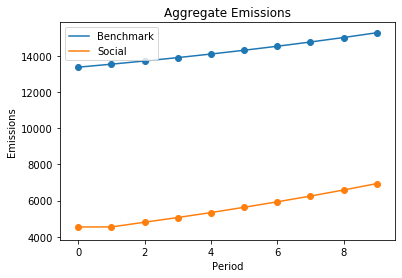

In [189]:
emissions_plotter([df_bm, df_sc],['Benchmark','Social'])

### Agent Graphing

In [350]:
sca_filepath = './social_agent.csv'

In [351]:
sca_df = pd.read_csv(sca_filepath)

In [352]:
sca_df.head()

,Period,AgentId,Budget,SelectedDeliveryPlan,UtilityIfGreen,UtilityIfNormal,UtilityDisparity,Emissions,EcoCon
0,0,0,2649.350198,Normal,6.999477,7.005346,-0.005869,31.438739,0.005223
1,1,0,2649.350198,Normal,6.999477,7.005341,-0.005864,31.438739,0.005223
2,2,0,2875.758731,Normal,7.080584,7.085636,-0.005053,33.823403,0.005223
3,3,0,3102.167264,Normal,7.155373,7.159717,-0.004344,36.170281,0.005223
4,4,0,3348.355053,Normal,7.230575,7.234242,-0.003667,38.681331,0.005223


In [363]:
def plot_data(ax, period_array, data, color, var_type, is_first_arr):
    if var_type == "High":
        ax.scatter(period_array, data,c=color)
        if is_first_arr[0]:
            ax.plot(period_array, data, c=color, label='High')
            is_first_arr[0] = False
        else:
            ax.plot(period_array, data, c=color)
    elif var_type == 'Medium':
        ax.scatter(period_array, data,c=color)
        if is_first_arr[1]:
            ax.plot(period_array, data, c=color, label='Medium')
            is_first_arr[1] = False
        else:
            ax.plot(period_array, data, c=color)
    elif var_type == "Low":
        ax.scatter(period_array, data,c=color)
        if is_first_arr[2]:
            ax.plot(period_array, data, c=color, label='Low')
            is_first_arr[2] = False
        else:
            ax.plot(period_array, data, c=color)
            
def get_high_med_low(agent_data, group_type):
    if group_type == 'Income':
        return get_income_type(agent_data)
    elif group_type == 'Eco Consciousness':
        return get_eco_type(agent_data)
    
def get_income_type(agent_data):
    final_period_budget = agent_data['Budget'].iloc[-1]
    if final_period_budget > 5500:
        return 'High'
    elif final_period_budget > 2000:
        return 'Medium'
    else:
        return 'Low'
    
def get_eco_type(agent_data):
    eco_con = agent_data['EcoCon'].iloc[-1]
    if eco_con > 0.006:
        return 'High'
    elif eco_con > 0.004:
        return 'Medium'
    else:
        return 'Low'
    
def get_color(agent_data, group_type, var_type):
    if group_type == 'Income':
        return get_color_from_high_mid_low(var_type)
        
    elif group_type == 'Eco Consciousness':
        return get_color_from_high_mid_low(var_type)
        
def get_color_from_high_mid_low(var_type):
    if var_type == "High":
        return 'b'
    elif var_type == 'Medium':
        return 'm'
    elif var_type == "Low":
        return 'c'
        

In [364]:
def agent_plotter(df, plot_type, group_type):
    fig, ax = plt.subplots(figsize=(12,8))

    ax.set_title(f'Agent {plot_type} by {group_type}')
    ax.set_ylabel(f'{plot_type}')
    ax.set_xlabel('Period')

    num_of_agents = len(df['AgentId'].unique())
    periods = len(df['Period'].unique())
    period_array = [i for i in range(periods)]
    
    is_first_high = True
    is_first_med = True
    is_first_low = True
    is_first_arr = [is_first_high, is_first_med, is_first_low]

    for i in range(num_of_agents):
        #get agent data
        agent_data = df.loc[df['AgentId'] == i]
        high_med_low = get_high_med_low(agent_data, group_type)
        color=get_color(agent_data, group_type, high_med_low)
        if plot_type == 'Emissions':
            emissions = agent_data['Emissions']
            plot_data(ax, period_array, emissions, color, high_med_low, is_first_arr)
            #ax.plot(period_array, emissions, c=color)
            #ax.scatter(period_array, emissions,c=color)
        elif plot_type == 'Utility Disparity':
            utility_disparity = agent_data['UtilityDisparity']
            plot_data(ax, period_array, utility_disparity, color, high_med_low, is_first_arr)
            ax.plot(period_array, utility_disparity, c=color)
            ax.scatter(period_array, utility_disparity, c=color)


    #plot zero line
    zero_line = [0 for i in period_array]
    ax.plot(period_array,zero_line,c='k', label='Zero Line')

    ax.legend(loc='upper left')


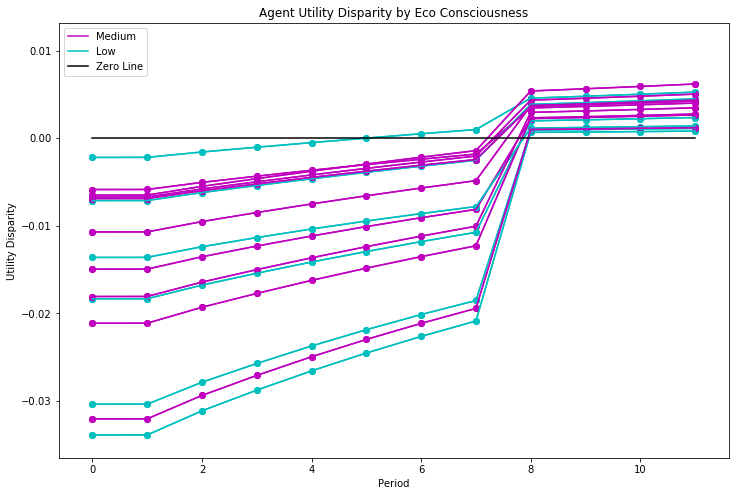

In [366]:
sca_filepath = './social_agent.csv'
sca_df = pd.read_csv(sca_filepath)

agent_plotter(sca_df, 'Utility Disparity', 'Eco Consciousness')


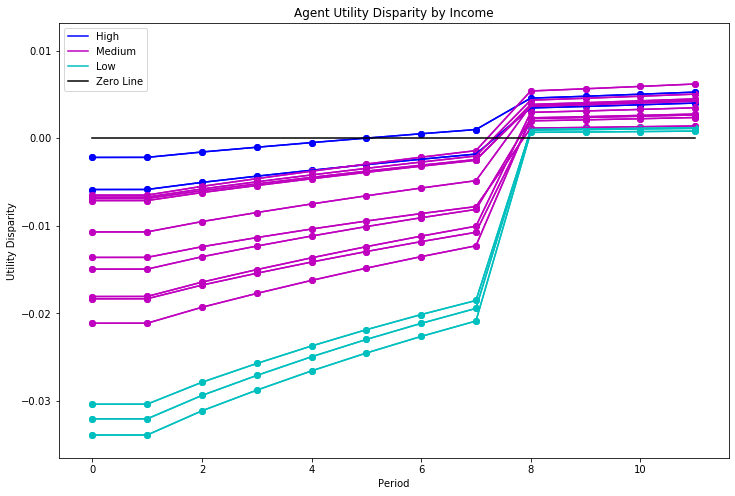

In [368]:
agent_plotter(sca_df, 'Utility Disparity', 'Income')

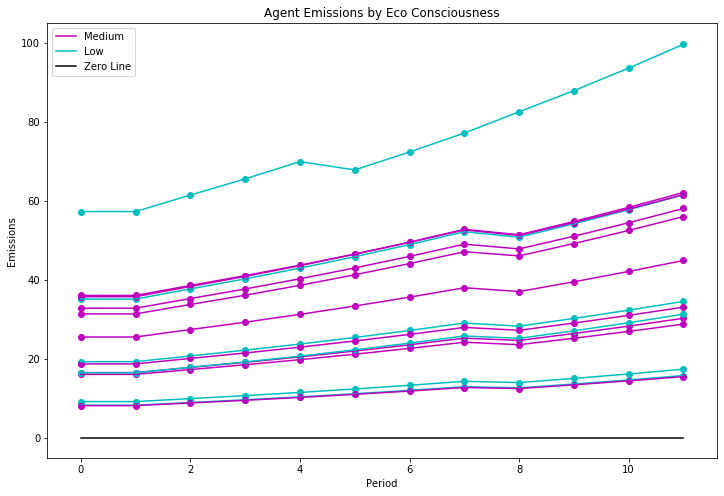

In [369]:
agent_plotter(sca_df, 'Emissions', 'Eco Consciousness')

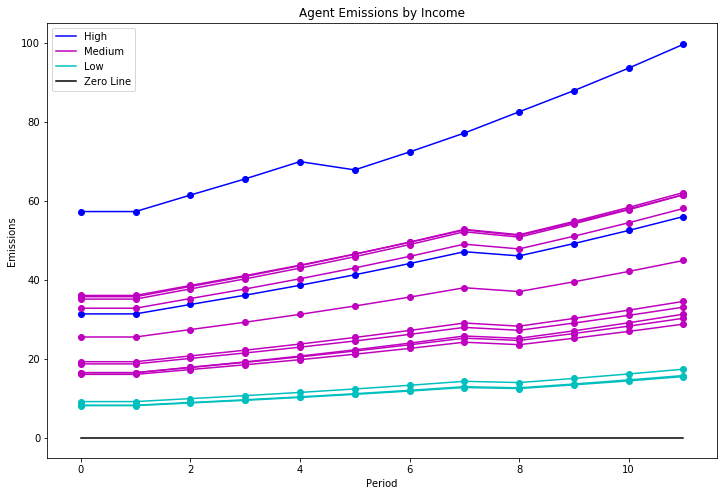

In [370]:
agent_plotter(sca_df, 'Emissions', 'Income')